In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [6]:
# Construccion del set de datos
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None
                        )

X, Y = gaussian_quantiles

In [7]:
X.shape

(1000, 2)

In [8]:
Y.shape

(1000,)

In [9]:
Y = Y[:,np.newaxis]

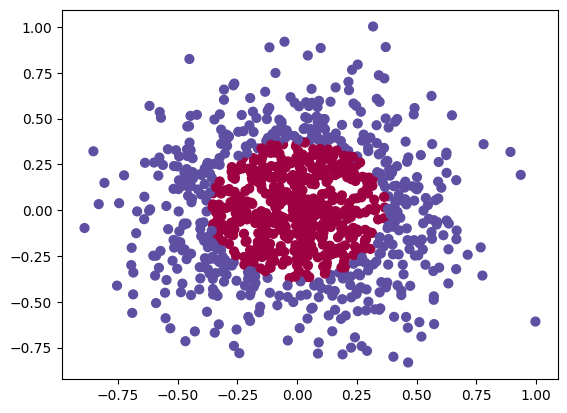

In [11]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0],s=40,cmap=plt.cm.Spectral)

Funciones de activación

In [19]:
def sigmoid (x, derivate=False):
    if derivate:
        return np.exp(-x) / ((np.exp(-x)+1)**2)
    else: 
        return 1 / (1+np.exp(-x))
    
def relu(x, derivate = False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.piecewise(x, [x < 0, x > 0], [0, lambda x: x])

Función de perdida

In [20]:
def mse(y,y_hat, derivate=False):
    if (derivate):
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

Estructura de la red neuronal

In [21]:
def inizializate_parameters_deep(layers_dim):
    parameters = {}
    L = len (layers_dim)
    for l in range(0,L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
        parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
    return parameters

In [22]:
layers_dim = [2,4,8,1]
params = inizializate_parameters_deep(layers_dim)

In [23]:
params

{'W1': array([[ 0.21391778,  0.49422755,  0.01650427, -0.10362861],
        [-0.62728515,  0.7517894 ,  0.79722998, -0.86327024]]),
 'b1': array([[ 0.36492822, -0.45556996, -0.26142749, -0.09274618]]),
 'W2': array([[ 0.16443987, -0.81905355, -0.70011153,  0.85698903, -0.32702601,
          0.1207725 ,  0.74705514,  0.59927141],
        [ 0.79821193, -0.51579288, -0.80915508, -0.41281255, -0.57690135,
         -0.83401009,  0.20757554, -0.52964217],
        [ 0.8645729 , -0.43851867, -0.44260344,  0.2776948 ,  0.6473244 ,
          0.36663522, -0.80202188, -0.02755986],
        [-0.55951262, -0.84419691,  0.75164232,  0.15293873,  0.85672947,
          0.61340297, -0.47917336, -0.83207014]]),
 'b2': array([[-0.27554885, -0.37929962, -0.49129103, -0.93174938,  0.26786836,
          0.8076193 ,  0.50716111,  0.79389746]]),
 'W3': array([[-0.46845044],
        [-0.66601442],
        [ 0.87572496],
        [ 0.82380021],
        [ 0.67620729],
        [ 0.58253186],
        [ 0.47987572],


In [24]:
# Producto punto entre los datos y los pesos de la red neuronal

np.matmul(X, params['W1'])

array([[-0.16283115,  0.07071135,  0.15913706, -0.15810228],
       [-0.038092  ,  0.49054287,  0.21933575, -0.28833402],
       [-0.43398915,  0.41955447,  0.51292641, -0.54392519],
       ...,
       [ 0.03904456, -0.0224132 , -0.04025556,  0.04080466],
       [-0.22478032,  0.36379101,  0.32194438, -0.35939817],
       [-0.22455485,  0.02545838,  0.19177656, -0.17982369]])

In [25]:
X@params['W1']

array([[-0.16283115,  0.07071135,  0.15913706, -0.15810228],
       [-0.038092  ,  0.49054287,  0.21933575, -0.28833402],
       [-0.43398915,  0.41955447,  0.51292641, -0.54392519],
       ...,
       [ 0.03904456, -0.0224132 , -0.04025556,  0.04080466],
       [-0.22478032,  0.36379101,  0.32194438, -0.35939817],
       [-0.22455485,  0.02545838,  0.19177656, -0.17982369]])

In [50]:
# Entrenamiento de la red 

def train(x_data, lr, params, training=True):
    ## Forward
    params['A0'] = x_data # Entrada de los datos

    params['Z1'] = params['A0']@params['W1'] + params['b1'] # Primera capa
    params['A1'] = relu(params['Z1']) # Funcion de activacion en la primer capa

    params['Z2'] = params['A1']@params['W2'] + params['b2'] # Segunda capa
    params['A2'] = relu(params['Z2']) # Funcion de activacion en la segunda capa

    params['Z3'] = params['A2']@params['W3'] + params['b3'] # Tercer capa / Capa de salida
    params['A3'] = sigmoid(params['Z3']) # Funcion de activacion en la segunda capa

    output = params['A3']

    if training:
        ## Backpropagation
        params['dZ3'] = mse(Y,output, True) * sigmoid(params['A3'], True)
        params['dW3'] = params['A2'].T@params['dZ3']

        params['dZ2'] = (params['dZ3']@params['W3'].T) * relu(params['A2'], True)
        params['dW2'] = params['A1'].T@params['dZ2']

        params['dZ1'] = (params['dZ2']@params['W2'].T) * relu(params['A1'], True)
        params['dW1'] = params['A0'].T@params['dZ1']

        ## Gradient descent

        params['W3'] = params['W3'] - params['dW3'] * lr # Learning rate
        params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * lr

        params['W1'] = params['W1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * lr

    return output

In [58]:
layers_dim = [2,4,8,1]
params = inizializate_parameters_deep(layers_dim)
errors = []

for _ in range(30000):
    output = train(X, 0.0001, params)
    if _ %25 == 0:
        print(mse(Y, output))
        errors.append(mse(Y, output))

0.25218830396882347
0.2515979767085794
0.2512226721706056
0.2509467438813738
0.25070906291782646
0.25048122722291044
0.25016449756352593
0.24940009880361982
0.24793242063193188
0.247019298915845
0.2466113997019803
0.24637341234152033
0.24620896221926797
0.24606736967074197
0.24594328887642194
0.24583175305702787
0.24572373122739663
0.24561647851198318
0.24551000347507834
0.245402290695113
0.24529190522109764
0.24517782241361494
0.24506074327335267
0.24493134374120756
0.24479781143649545
0.2446614163022618
0.24452179854003186
0.24437746583369152
0.24422560800431153
0.24406517387597307
0.24389888064935522
0.2437265829696275
0.24354545304626637
0.24335735387327925
0.24316162698230834
0.24295617852386608
0.24274400670551846
0.24252558052115705
0.24229898178448495
0.2420628236542417
0.24181591762762594
0.24156562911001184
0.24131347119992191
0.24105570794114783
0.24078280895534976
0.24050672965501133
0.24023028380136452
0.23994682507794135
0.2396606886912894
0.23937215308713536
0.2390738932

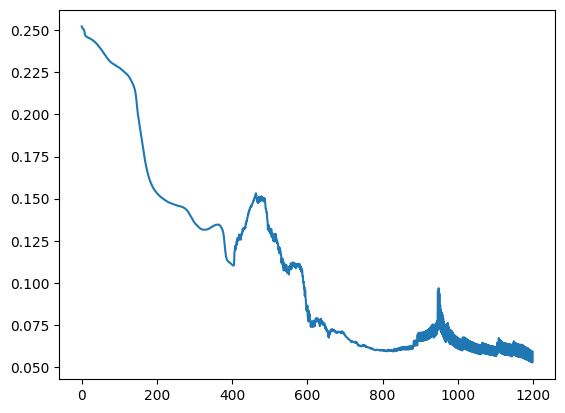

In [59]:
plt.plot(errors)

Test

In [60]:
data_test = (np.random.rand(1000,2) * 2) - 1 
y = train(data_test, 0.00001, params, training=False)

In [61]:
y

array([[9.99993173e-01],
       [9.91515859e-01],
       [9.99744053e-01],
       [9.99999787e-01],
       [8.47613765e-02],
       [9.99999089e-01],
       [9.99999996e-01],
       [9.99981544e-01],
       [1.00000000e+00],
       [9.99999784e-01],
       [9.99999839e-01],
       [8.36397692e-01],
       [9.99997590e-01],
       [8.51870249e-01],
       [9.68027058e-01],
       [9.99990413e-01],
       [7.03422369e-03],
       [9.99925295e-01],
       [9.99578344e-01],
       [9.99453522e-01],
       [9.99999833e-01],
       [9.99999986e-01],
       [9.98910462e-01],
       [8.41796958e-01],
       [9.99995440e-01],
       [9.72478648e-01],
       [9.99998811e-01],
       [9.99947949e-01],
       [9.99993553e-01],
       [7.62391291e-01],
       [9.99996358e-01],
       [9.99997034e-01],
       [9.94806288e-01],
       [9.99999998e-01],
       [9.99994977e-01],
       [1.65410222e-05],
       [1.00000000e+00],
       [9.99994430e-01],
       [9.99980124e-01],
       [9.99998190e-01],


In [62]:
y = np.where(y >= 0.5, 1, 0)
y

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

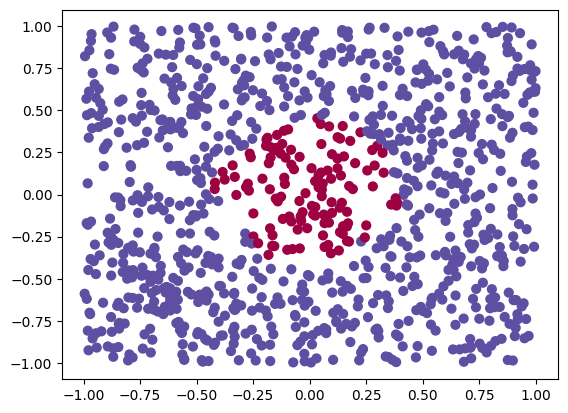

In [63]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0],s=40,cmap=plt.cm.Spectral)